# Plotting with pandas

It is time to learn how to plot with our favorite data wrangling tool : pandas 🐼.

We will be using the open data powering https://www.rte-france.com/eco2mix website. 

The pre-processing of the data has been already done for you. All you need is to learn how read pickles from pandas.

![pickles](https://static.wikia.nocookie.net/rickandmorty/images/4/41/Pickle_rick_transparent_edgetrimmed.png)


## Exercise - setup our (plotting) environnemnt

In [85]:
# load pandas, matplotlib and setup your environment for bigger figures by default (check matplotlib's "rcParams")
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

mpl.rcParams.update({'figure.figsize':(30, 10)})

## Exercise : load the data from pickle file

In [2]:
# Load from the pickle file eco2mix
df = pd.read_pickle("eco2mix.pkl")

In [3]:
df.sample(10) # Expected Results

,Périmètre,Consommation,Thermique,Nucléaire,Eolien,Solaire,Hydraulique,Pompage,Bioénergies,Ech. physiques
DateTime,,,,,,,,,,
2015-10-15 03:30:00,Bretagne,2031.0,0.0,NaN,94.0,0.0,197.0,-1.0,30.0,1712.0
2018-01-11 07:45:00,Bretagne,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-16 02:00:00,Bourgogne-Franche-Comté,1644.0,59.0,NaN,281.0,0.0,98.0,0.0,42.0,1164.0
2014-01-15 23:45:00,Pays-de-la-Loire,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-05-06 08:45:00,Pays-de-la-Loire,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-06-16 19:00:00,Ile-de-France,7827.0,-3.0,NaN,0.0,18.0,9.0,NaN,105.0,7697.0
2017-12-31 19:45:00,Ile-de-France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-14 04:30:00,Normandie,3133.0,919.0,7193.0,73.0,0.0,8.0,NaN,46.0,-5107.0
2017-02-21 11:00:00,PACA,5240.0,1876.0,NaN,25.0,546.0,1094.0,0.0,111.0,1588.0


# Plotting with Matplotlib


##  Exercise -  Pie chart 

Choose a year in the data, and plot the share for each of the different energy sources.

_Going further : potential drawbacks of this kind of plot. See : https://www.surveygizmo.com/resources/blog/pie-chart-or-bar-graph/_

In [45]:
df_2017.columns

Index(['Thermique', 'Nucléaire', 'Eolien', 'Solaire', 'Hydraulique',
       'Bioénergies'],
      dtype='object')

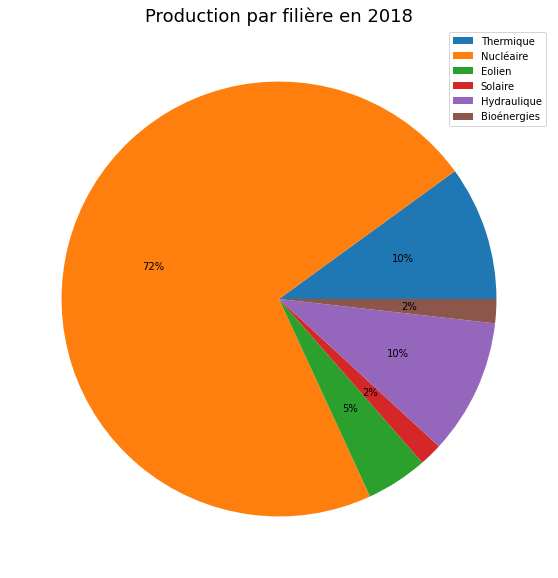

In [57]:
# Choose a year in the data, and plot the share for each of the different energy sources.
df_2017 = df.loc['2017'].iloc[:,2:9] # df[df.index.year==2017].iloc[:,2:9] 
df_2017 = df_2017.drop(['Pompage'], axis=1)
df_2017_pie = df_2017.sum().div(df_2017.sum().sum()).mul(100) # il faut faire cette somme pour pie 

fig, ax = plt.subplots()
ax.pie(df_2017_pie, autopct = lambda x: str(round(x)) + '%')
ax.set_title("Production par filière en 2018", fontsize=18)
ax.legend(df_2017.columns) # plt.legend(df_2017.columns)
plt.show()


![example](img/img/pie.png)

## Exercise :  Horizontal Bar

Use the same data used to produce the pie chart, but this time use an horizontal bar.

_Tip: When possible, try to replace pie charts with horizontal bar_

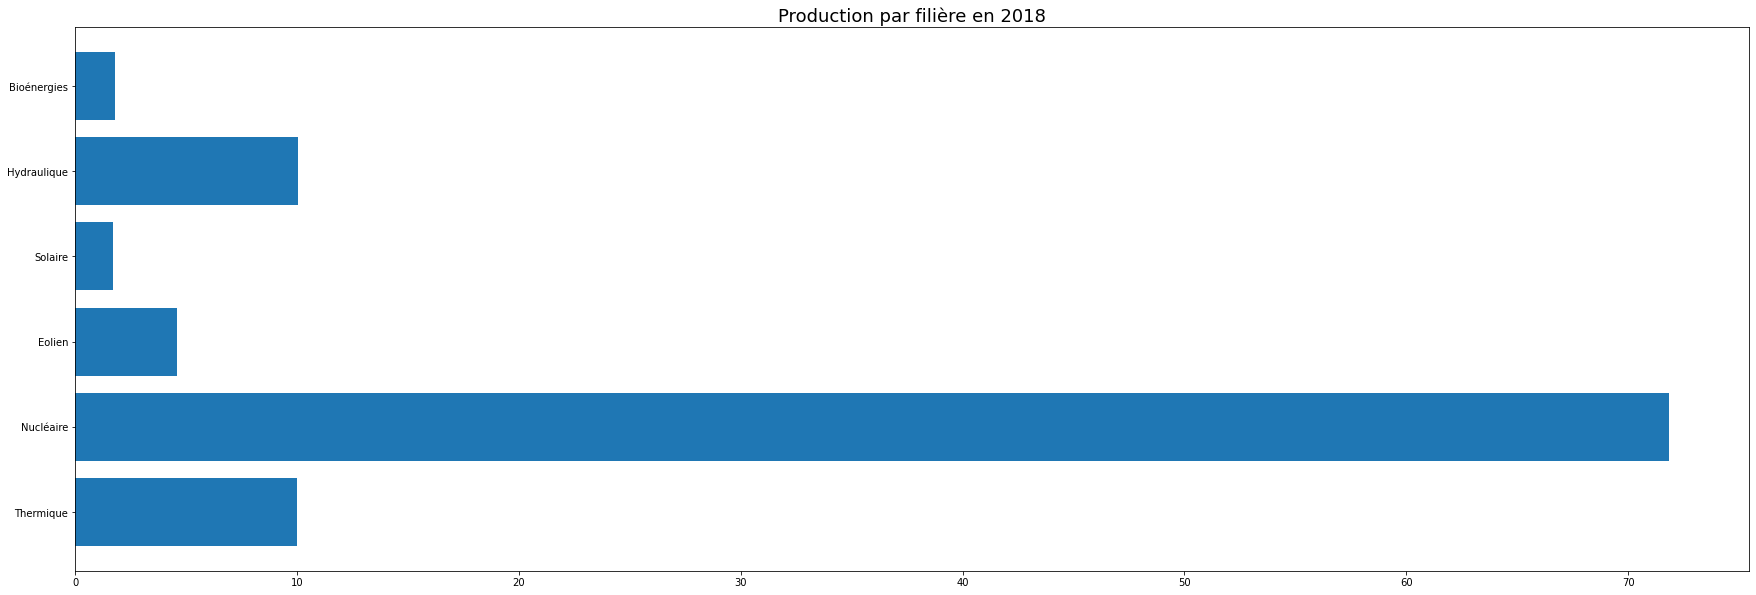

In [65]:
# When thinking about pie charts, give a try to horizontal bars.
fig, ax = plt.subplots()
ax.barh(y = df_2017_pie.index, width=df_2017_pie.values)
ax.set_title("Production par filière en 2018", fontsize=18)
plt.show()

## Exercise : Area chart

Explore data trends thanks to an area chart.

<AxesSubplot:xlabel='DateTime'>

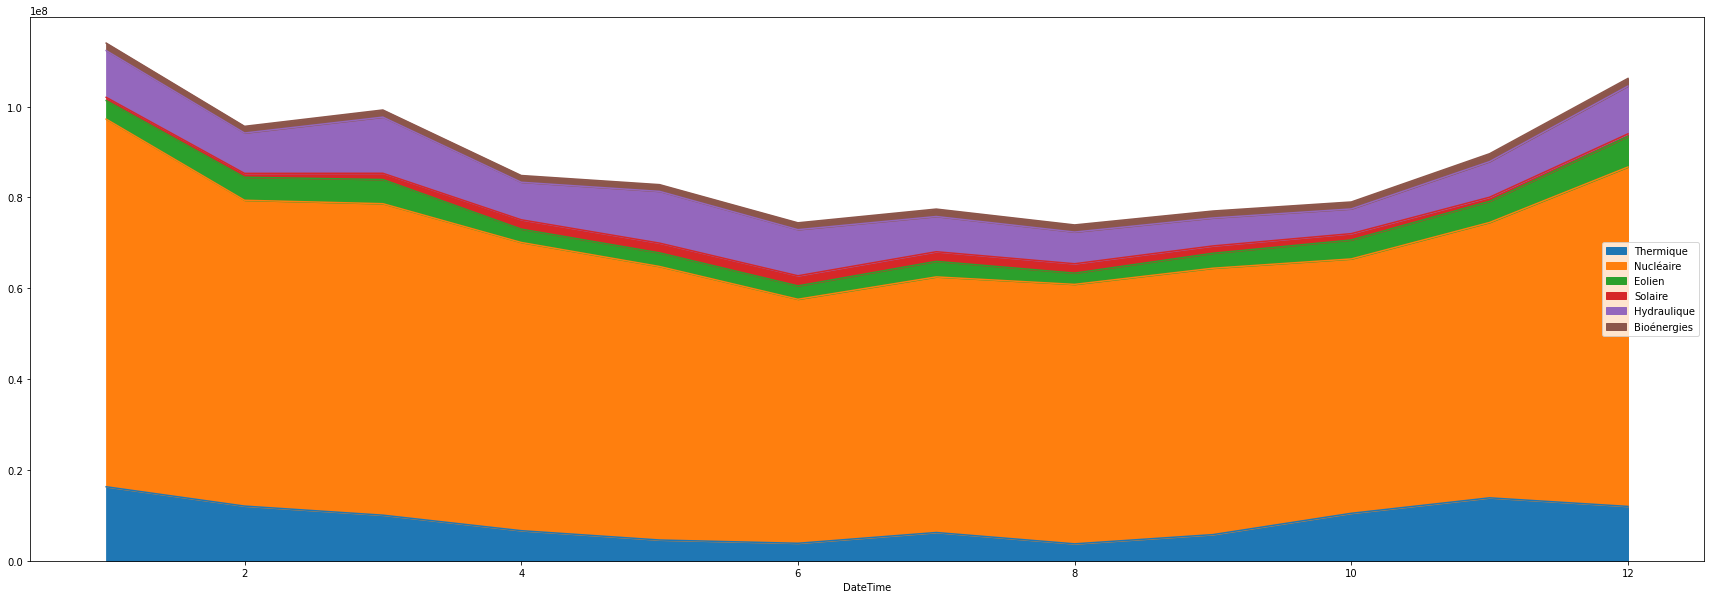

In [76]:
# Explore trends
area_chart = df_2017.groupby(df_2017.index.month).sum()
area_chart.plot.area()

toviz= df.groupby(df.index.year).sum()
toviz=toviz.loc[:,toviz.columns !="Consommation"]
toviz.plot(kind="area")
plt.legend(bbox_to_anchor=(1., 1.))



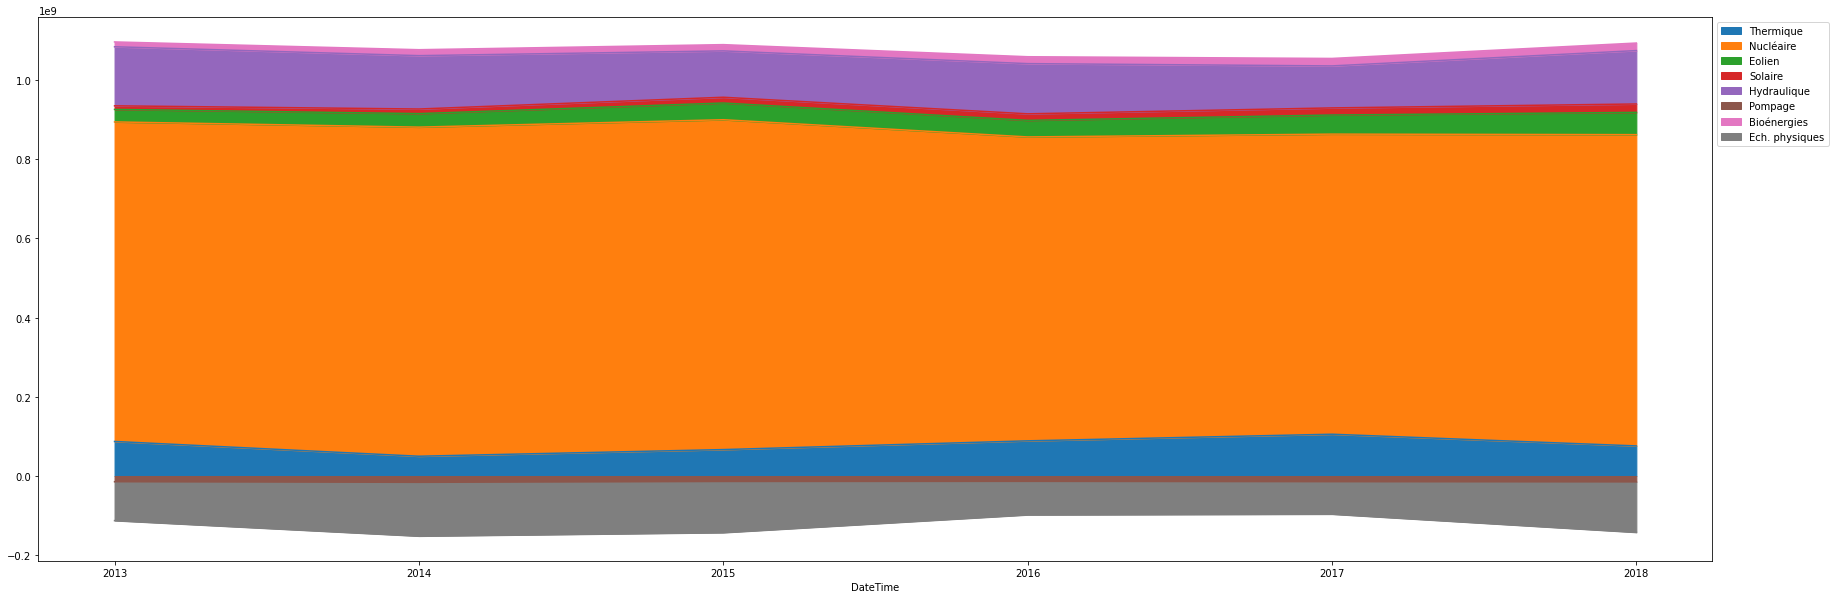

In [83]:
toviz= df.groupby(df.index.year).sum()
toviz=toviz.loc[:,toviz.columns !="Consommation"]
toviz.plot(kind="area")
plt.legend(bbox_to_anchor=(1., 1.))

## Exercise : Scatter Plot

Scatter plots are helpful to put in evidence relationships between two variables. Can you find a data relationships and make it visible with a plot ?

_Bonus: try seaborn joint plots_

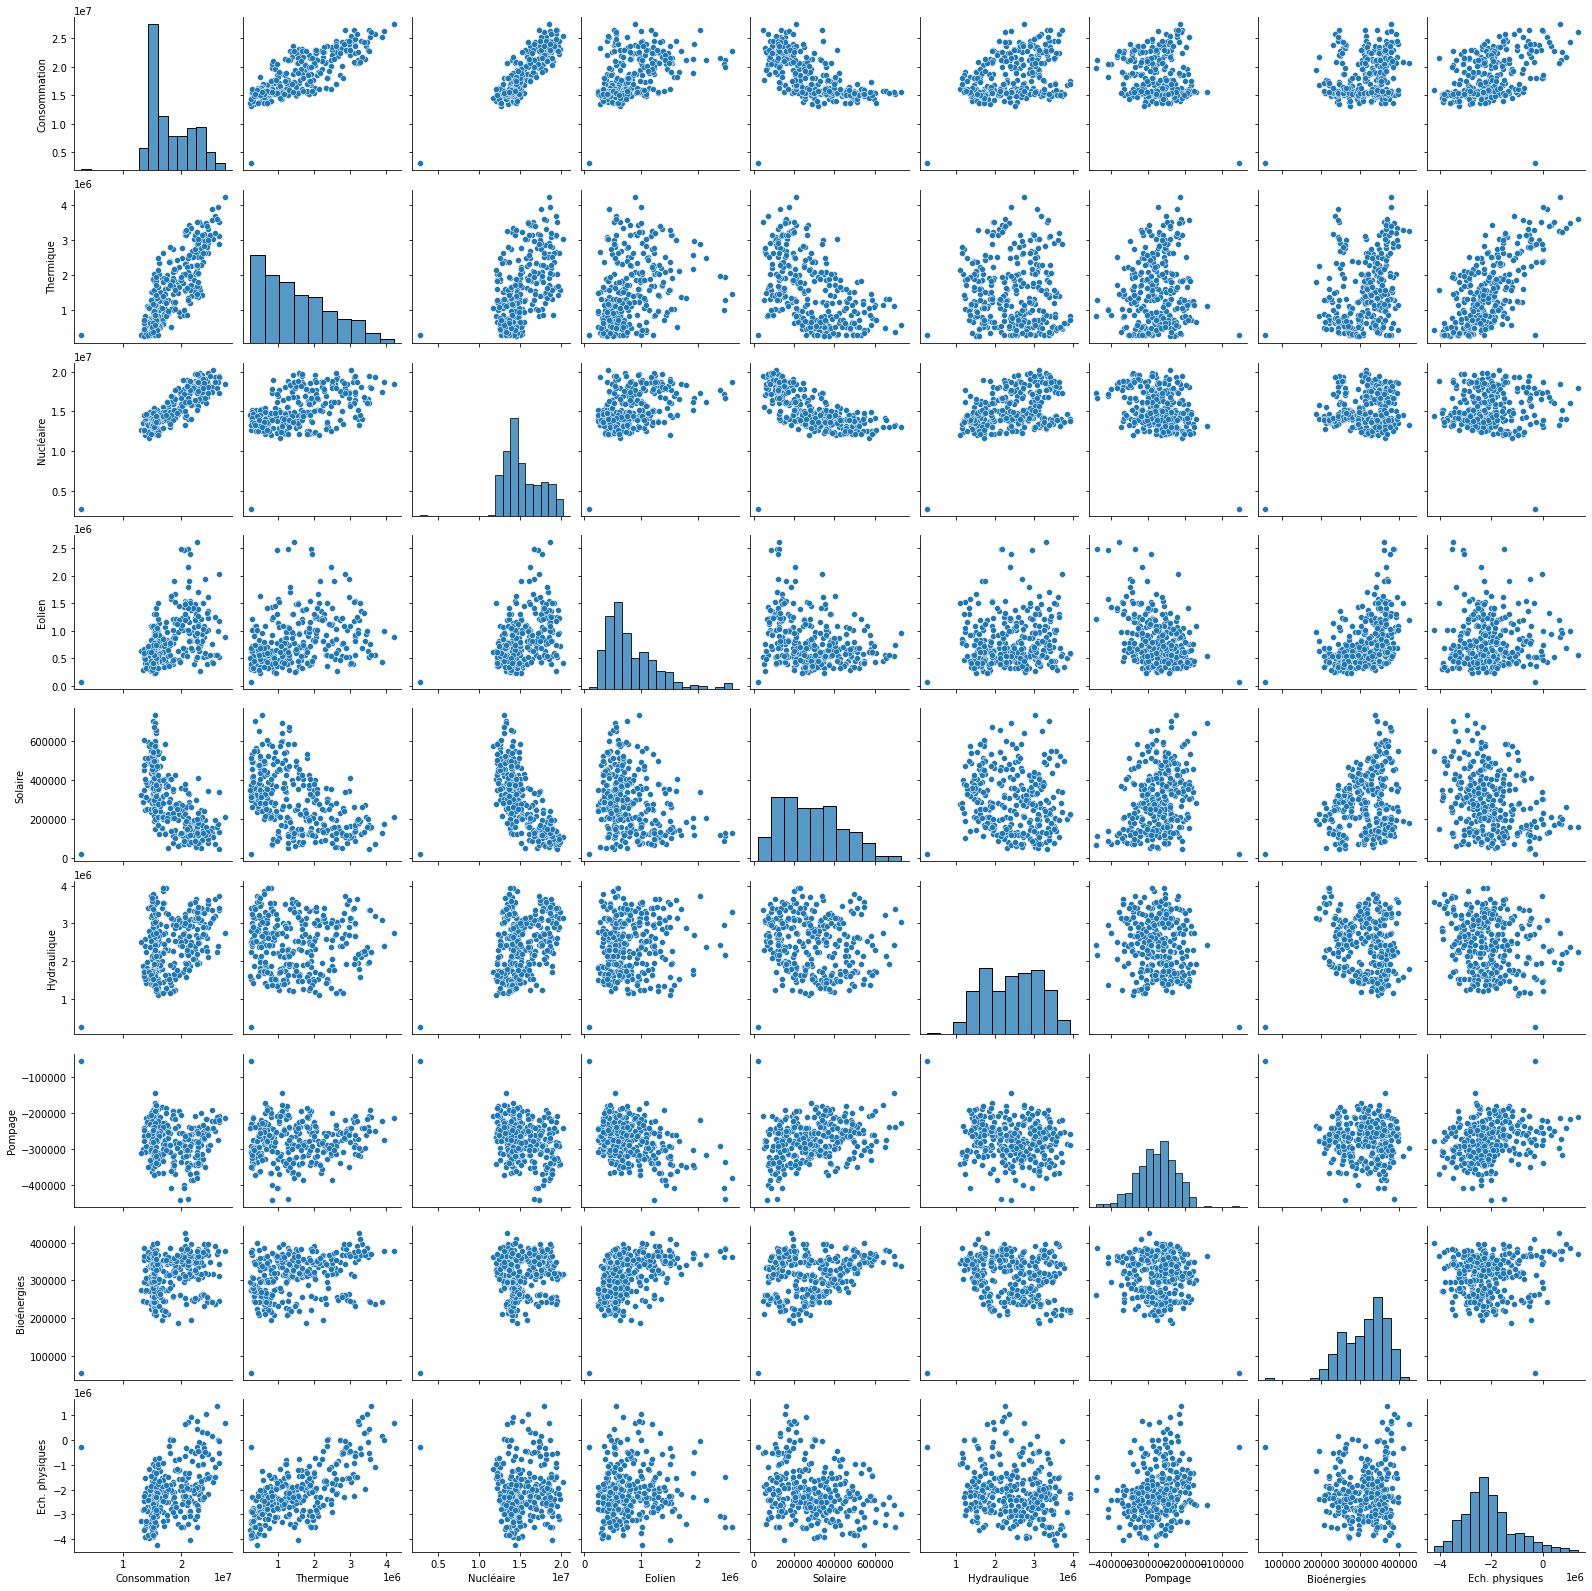

In [89]:
# Explore variables relationships with scatter plot
df_sem=df.resample("W").sum()
sns.pairplot(data=df_sem);

ValueError: cannot reindex from a duplicate axis

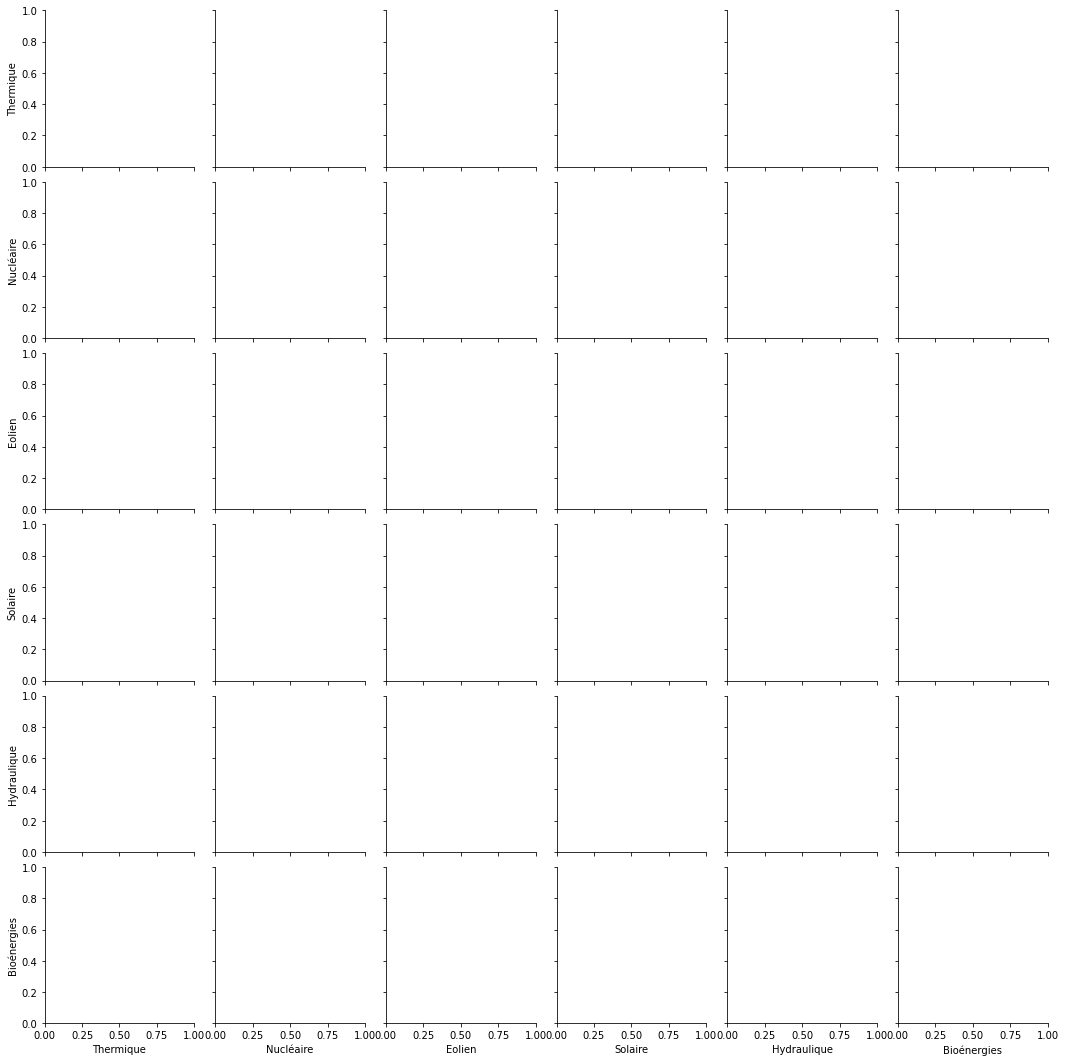

In [91]:
sns.pairplot(df_2017)

# Plotting with Plotly (optional)

In order to go further you can learn an alternative plot library: Plotly.

Two possible ways of using plotly with pandas :
 - https://plotly.com/python/pandas-backend/
 - https://github.com/santosjorge/cufflinks
 
Do previous exercises with plotly. 

Which library do you prefer ? Which plotly integration works better ?